<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/getZdimuon_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # módulo do Python usado para o ajuste
import io
from google.colab import files
uploaded = files.upload()      # para o google colab ler o arquivo .csv

ds=pd.read_csv('Z_mumu.csv')
##ds = pd.read_csv(io.StringIO(uploaded['Z_mumu.csv'].decode('utf-8')))


Saving Z_mumu.csv to Z_mumu.csv


In [0]:
print(ds.head())

      Run     Event Type1        E1  ...      eta2      phi2  Q2         M
0  165617  74601703     G   9.69873  ...  0.775564 -0.155984   1  17.49220
1  165617  75100943     G   6.20385  ... -0.678625 -0.369977   1  11.55340
2  165617  75587682     G  19.28920  ...  1.449670 -0.108575   1   9.16361
3  165617  75660978     G   7.04268  ... -0.660499  0.187488   1  12.47740
4  165617  75947690     G   7.27507  ...  0.322677  1.628190   1  14.31590

[5 rows x 21 columns]


Fazer o fit no pico de massa do bóson Z:

The values and the uncertainties from the optimization

The value of the decay width (\Gamma) = 3.8393333360077757 +- 0.07081456478026792
The value of the maximum of the distribution (M) = 90.83165102821579 +- 0.028321241431748616
a = -0.4704928504361758 +- 0.07717602719638328
b = 45.1666741132676 +- 7.518453763409262
A = 10086.386762445876 +- 128.06910141585283


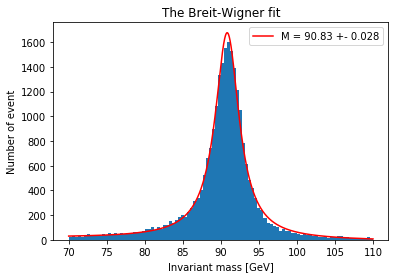

In [6]:
# Let's limit the fit near to the peak of the histogram.
lowerlimit = 70
upperlimit = 110
bins = 100

#Let's create a histogram of the selected values.
histogram = plt.hist(ds.M, bins=bins, range=(lowerlimit,upperlimit))

# In y-axis the number of the events per each bin (can be got from the variable histogram).
# In x-axis the centers of the bins.
y = histogram[0]
x = 0.5*( histogram[1][0:-1] + histogram[1][1:] )

# Let's define a function that describes Breit-Wigner distribution for the fit.
# E is the energy, gamma is the decay width, M the maximum of the distribution
# and a, b and A different parameters that are used for noticing the effect of
# the background events for the fit.
def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

# Initial values for the optimization in the following order:
# gamma (the full width at half maximum (FWHM) of the distribution)
# M (the maximum of the distribution)
# a (the slope that is used for noticing the effect of the background)
# b (the y intercept that is used for noticing the effect of the background)
# A (the "height" of the Breit-Wigner distribution)
initials = [3, 92, -2, 200, 13000]

best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
    
# Let's print the values and uncertainties that are got from the optimization.
print("The values and the uncertainties from the optimization")
print("")
first = r"The value of the decay width (\Gamma) = {} +- {}".format(best[0], error[0])
second = "The value of the maximum of the distribution (M) = {} +- {}".format(best[1], error[1])
third = "a = {} +- {}".format(best[2], error[2])
fourth = "b = {} +- {}".format(best[3], error[3])
fifth = "A = {} +- {}".format(best[4], error[4])
print(first)
print(second)
print(third)
print(fourth)
print(fifth)

x_f = np.linspace(70, 110, 4000)
plt.plot(x_f, breitwigner(x_f, *best), 'r-', label='M = {:2.2f} +- {:1.2}'.format(best[1], error[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()

In [0]:
from scipy.stats import crystalball

from google.colab import files
uploaded = files.upload()      # para o google colab ler o arquivo .csv

ds=pd.read_csv('JPsi_mumu.csv')
print(ds.head())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ 1.00000000e+01  3.00000000e+00 -3.19088993e+01 -1.79593555e+03
 -8.30754776e-01  7.55787932e+00]


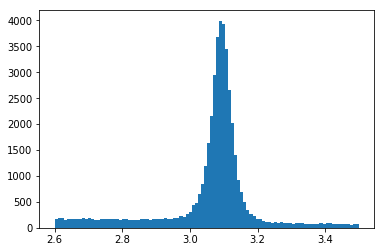

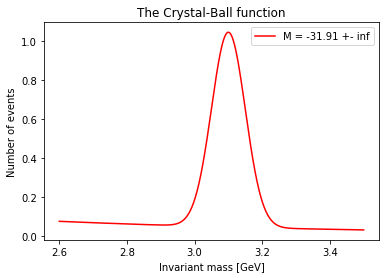

In [42]:

def crystalball_function(x, alpha, n, sigma, mean):
    '''Evaluate the crystal ball function'''
    
    if sigma < 0.:
        return 0.
    
    a = np.abs(alpha)
    z = (x-mean)/sigma
    
    if alpha < 0:
        z = -z
    
    A = np.power(n/a, n)*np.exp(-0.5*np.power(a, 2))
    B = (n/a) - a
    
    condition = np.where(True, z > -alpha, z <= -alpha)
    evaluate = np.where(condition, np.exp(-0.5*np.power(z, 2)), A*np.power(B - z, -n))
    
    return evaluate

def crystalball_plus_expo(x, alpha, n, sigma, mean, slope, b):
  return np.exp(b + slope*x) + crystalball_function(x, alpha, n, sigma, mean)

def crystalexpo(x, beta, m, slope, b):
  return np.exp(b + slope*x) + crystalball.pdf(x, beta, m)


plt.figure(1)
histogram = plt.hist(ds.M, bins=100)

#valores iniciais para o fit:
initials = [10, 3, 1., 3.1, 1, 0]
#eixos para o fit:
x = 0.5*( histogram[1][0:-1] + histogram[1][1:] )
y=histogram[0]
#fit
best, covariance = curve_fit(crystalball_plus_expo, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
print(best)  


plt.figure(2)
x_f = np.linspace(2.6, 3.5, 900)
plt.plot(x_f, crystalball_plus_expo(x_f, 10, 1, 0.05, 3.1, -1, 0), 'r-', label='M = {:2.2f} +- {:1.2}'.format(best[2], error[2]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('The Crystal-Ball function')
plt.legend()

plt.show()
